<a href="https://colab.research.google.com/github/POPE001/Stock-Price-Prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction using Convolutional Neural Networks (CNN) and Feature Extraction

In [ ]:
#library imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [ ]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')



In [ ]:
# Set the folder path in your Google Drive
folder_path = 'stocks.csv'



#Dataset Preprocessing





In [ ]:
# Load the data from CSV
data = pd.read_csv('stocks.csv')

In [ ]:
#Dimension of the dataset
data.shape

(373758, 7)

In [ ]:
# Check for missing values
print(data.isnull().sum())


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


In [ ]:
# Remove rows with missing values
data = data.dropna()

In [ ]:
# Drop irrelevant columns
data = data.drop(['OpenInt'], axis=1)

In [ ]:
# Sort the dataframe by date in ascending order
data = data.sort_values('Date')

In [ ]:
# Print the cleaned dataset
print(data.head())

             Date    Open    High     Low   Close  Volume
51631  1970-01-02  2.2972  2.3178  2.2972  2.2972   26437
4521   1970-01-02  2.2972  2.3178  2.2972  2.2972   26437
51632  1970-01-05  2.2972  2.2972  2.2544  2.2759   29887
4522   1970-01-05  2.2972  2.2972  2.2544  2.2759   29887
51633  1970-01-06  2.2759  2.2759  2.2342  2.2342  106900


In [ ]:
#printing the list of columns present
print(data.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


In [ ]:
# columns present in the dataset
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

####Scatter Plot that illustrates the relationship between the volume of stock trades and Mid Price

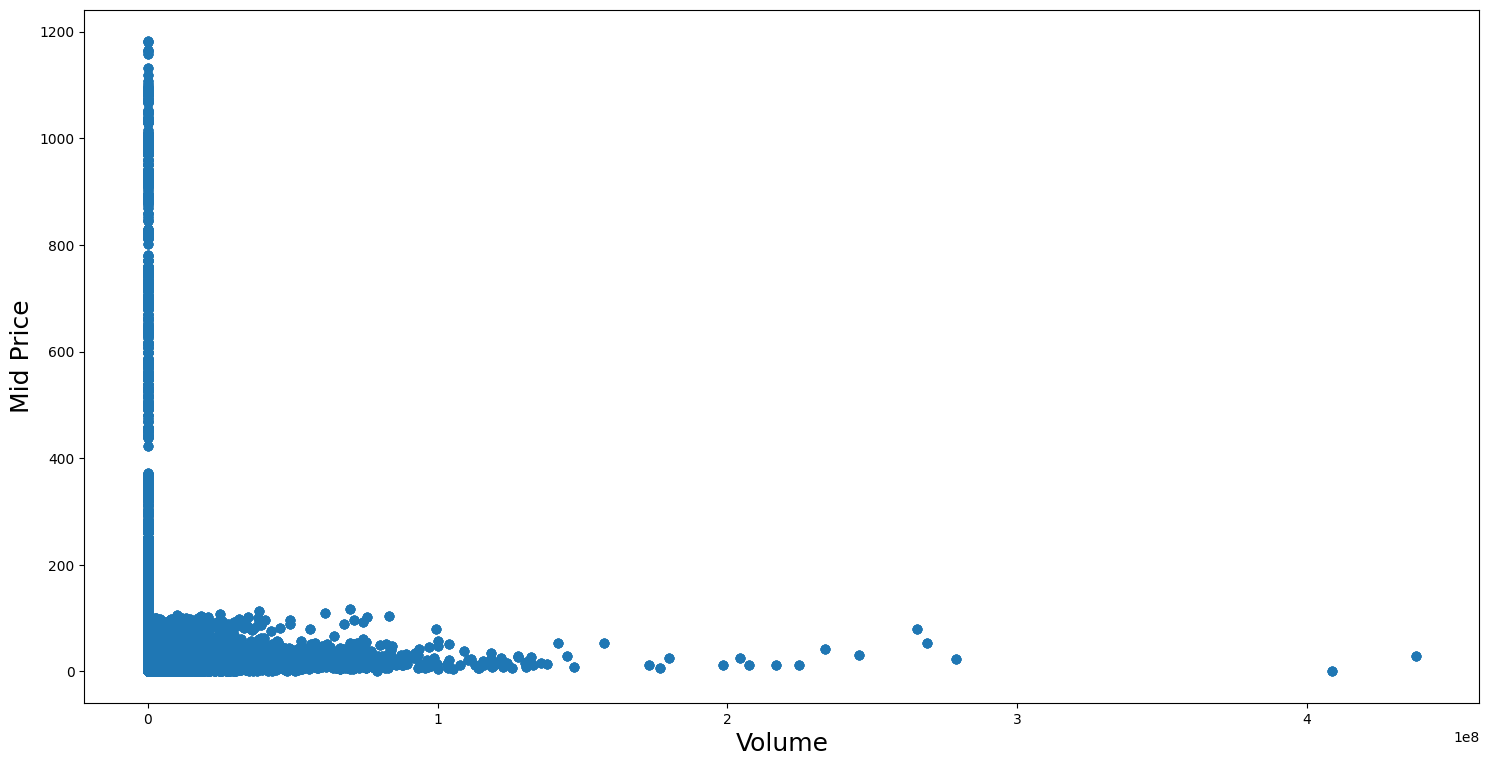

In [ ]:
import matplotlib.pyplot as plt

# Visualize the relationship between volume and mid price
plt.figure(figsize=(18, 9))
plt.scatter(data['Volume'], (data['Low'] + data['High']) / 2.0, alpha=0.5)
plt.xlabel('Volume', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.title('Relationship between Volume and Mid Price')
plt.show()


#Feature Extraction

##### In the feature extraction step, we extract relevant information from the stock dataset to represent each data point. This typically involves transforming the raw data into numerical features that capture important characteristics such as price trends, volatility, and trading volume. These features serve as input for the CNN model to learn patterns and make predictions

In [ ]:
# feature extraction
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Splitting the Dataset

In [ ]:
# Split data into input (X) and output (y) variables
X = scaled_data[:, 1:]  # Exclude the 'OpenInt' column
y = scaled_data[:, 0]   # Predict the 'Open' colum

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshape the input data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#Building the Model

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

#Model Compilation

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Model Training

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1830/1830 [==============================] - 9s 4ms/step - loss: 3.2381e-04 - val_loss: 9.7600e-05
Epoch 2/10
1830/1830 [==============================] - 6s 3ms/step - loss: 1.9277e-04 - val_loss: 7.8278e-05
Epoch 3/10
1830/1830 [==============================] - 6s 3ms/step - loss: 1.6698e-04 - val_loss: 2.7231e-04
Epoch 4/10
1830/1830 [==============================] - 6s 3ms/step - loss: 1.7174e-04 - val_loss: 4.0857e-04
Epoch 5/10
1830/1830 [==============================] - 5s 3ms/step - loss: 1.7696e-04 - val_loss: 2.4190e-04
Epoch 6/10
1830/1830 [==============================] - 7s 4ms/step - loss: 1.5352e-04 - val_loss: 3.0343e-04
Epoch 7/10
1830/1830 [==============================] - 5s 3ms/step - loss: 1.5318e-04 - val_loss: 4.3631e-04
Epoch 8/10
1830/1830 [==============================] - 6s 3ms/step - loss: 1.5347e-04 - val_loss: 3.1328e-04
Epoch 9/10
1830/1830 [==============================] - 6s 3ms/step - loss: 1.5264e-04 - val_loss: 2.5579e-04
Epoch 10/1

#Model Evaluation

In [ ]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

test_predictions = model.predict(X_test)
test_accuracy = 1 - np.mean(np.abs(test_predictions - y_test))
print("Test Accuracy:", test_accuracy*100)

458/458 [==============================] - 1s 2ms/step - loss: 3.8615e-04
Test Loss: 0.0003861533768940717
458/458 [==============================] - 1s 1ms/step
Test Accuracy: 96.74262952332498


##Model Performance Plots

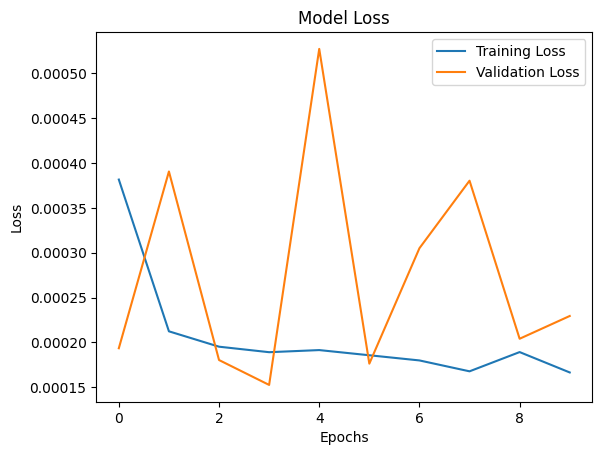

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

###Line plot that visualizes the historical stock prices over time

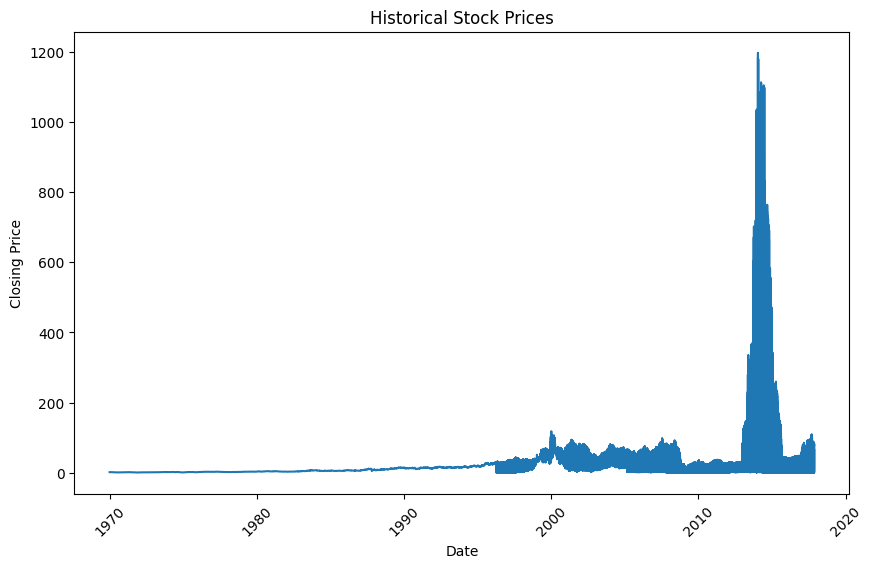

In [ ]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Stock Prices')
plt.xticks(rotation=45)
plt.show()


###The code calculates and prints three evaluation metrics used to assess the performance of a predictive model: Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

#####These metrics are computed by comparing the predicted values (test_predictions) with the actual values (y_test).

In [ ]:
#CNN Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.00038615329263157785
Mean Absolute Error: 0.005971754807849969
Root Mean Squared Error: 0.01965078351190043


##Correlation Matrix

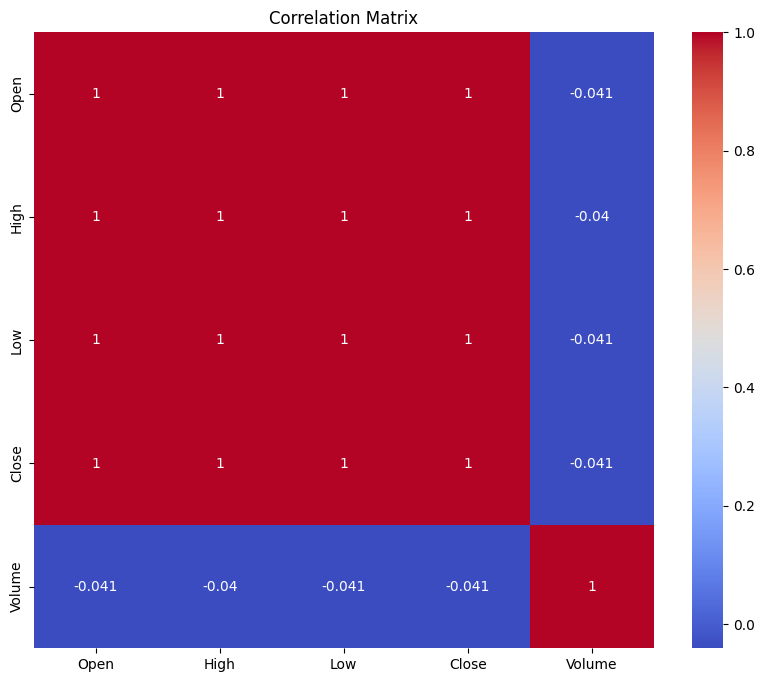

In [ ]:
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


***This visualization provides insights into the level of trading activity in the stock market for the given dataset. It helps identify patterns, trends, or changes in trading volume over time.***


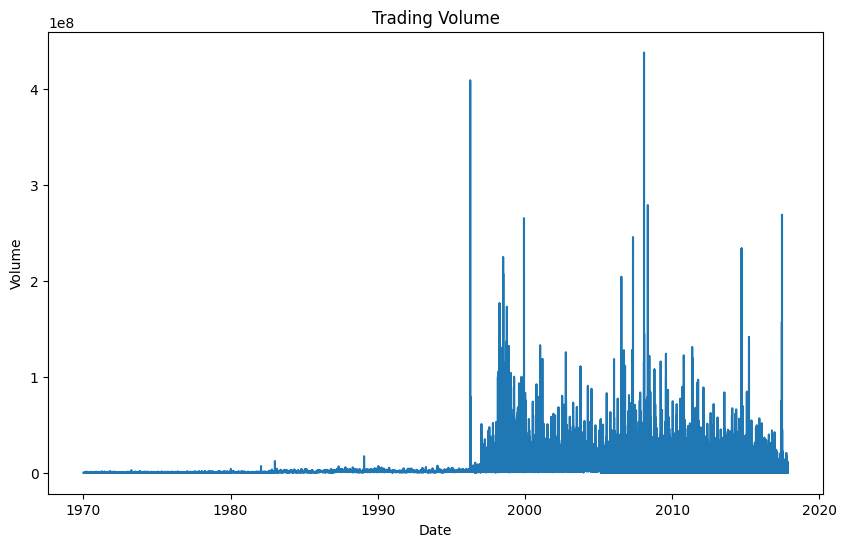

In [ ]:
#Volume Analysis
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume')
plt.show()


***Histogram to visualize the distribution of stock prices***

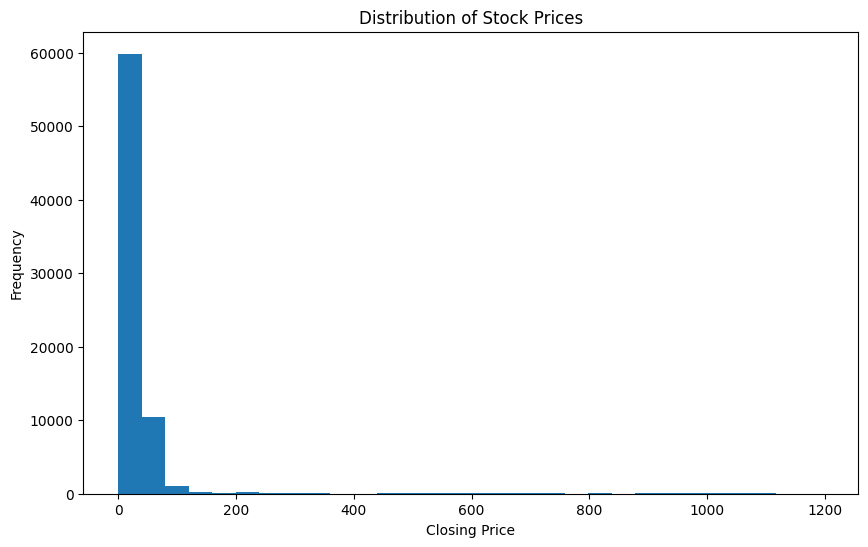

In [ ]:
#Distribution of Stock Prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Prices')
plt.show()


##Rolling Average Plot


This visualization represents the actual stock prices and their corresponding rolling average. The x-axis represents the dates, and the y-axis represents the closing prices of the stocks.

The blue line in the plot represents the actual closing prices over time. It provides a visual representation of the historical price fluctuations in the stock market.

The orange line represents the rolling average of the closing prices, which is calculated by taking the mean of the previous 30 days' closing prices. The rolling average smooths out short-term fluctuations and reveals the overall trend in the stock prices. It helps identify long-term patterns and potential trends in the market.

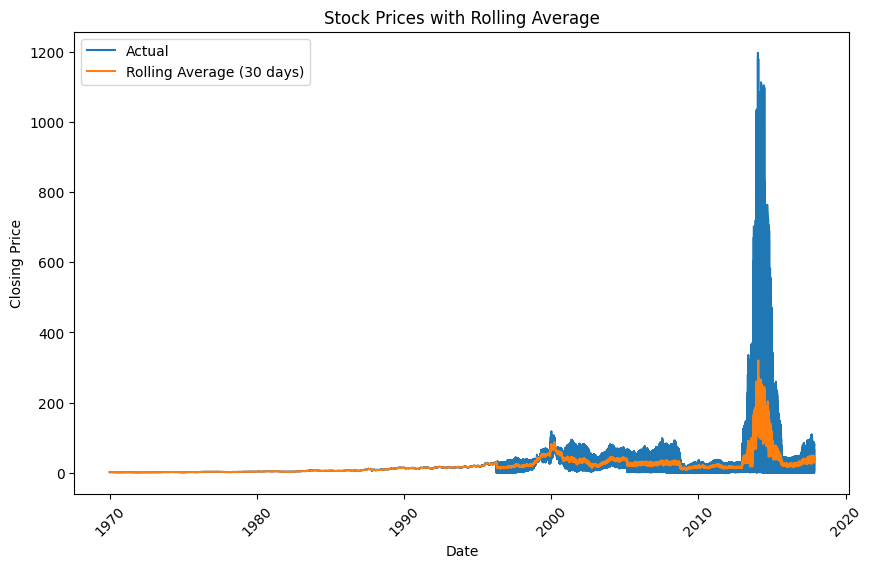

In [ ]:
# Stock Prices with Rolling Average
window_size = 30
rolling_avg = data['Close'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, rolling_avg, label=f'Rolling Average ({window_size} days)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices with Rolling Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()


##Benchmark models for Comparison

###Support Vector Regression (SVR)


In [ ]:
from sklearn.svm import SVR

# Reshape the input data for SVR
X_train_svr = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test_svr = X_test.reshape((X_test.shape[0], X_test.shape[1]))

# SVR model
svr = SVR()

# Fit the model
svr.fit(X_train_svr, y_train)

# Predict using the trained model
svr_predictions = svr.predict(X_test_svr)

# Calculate evaluation metrics for SVR
svr_accuracy = svr.score(X_test_svr, y_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)

# Print evaluation metrics for SVR
print("Support Vector Regression (SVR) Results:")
print("Accuracy:", svr_accuracy)
print("Mean Squared Error:", svr_mse)
print("Mean Absolute Error:", svr_mae)
print()


Support Vector Regression (SVR) Results:
Accuracy: -0.037556143136394216
Mean Squared Error: 0.006312583160069669
Mean Absolute Error: 0.07835131181397506



###Recurrent Neural Networks (RNN) with LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create RNN model
rnn = Sequential()
rnn.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn.add(Dense(1))

# Compile the model
rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict using the trained model
rnn_predictions = rnn.predict(X_test)

rnn_accuracy = rnn.evaluate(X_test, y_test)
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_mae = mean_absolute_error(y_test, rnn_predictions)



Epoch 1/10
1830/1830 [==============================] - 15s 7ms/step - loss: 1.5300e-04 - val_loss: 3.4517e-05
Epoch 2/10
1830/1830 [==============================] - 13s 7ms/step - loss: 1.4670e-05 - val_loss: 2.5913e-05
Epoch 3/10
1830/1830 [==============================] - 13s 7ms/step - loss: 1.3950e-05 - val_loss: 7.0628e-06
Epoch 4/10
1830/1830 [==============================] - 12s 7ms/step - loss: 1.2417e-05 - val_loss: 1.1131e-05
Epoch 5/10
1830/1830 [==============================] - 13s 7ms/step - loss: 1.2188e-05 - val_loss: 7.9098e-06
Epoch 6/10
1830/1830 [==============================] - 13s 7ms/step - loss: 1.3268e-05 - val_loss: 9.2510e-06
Epoch 7/10
1830/1830 [==============================] - 12s 7ms/step - loss: 1.2253e-05 - val_loss: 6.8629e-06
Epoch 8/10
1830/1830 [==============================] - 23s 13ms/step - loss: 1.1324e-05 - val_loss: 1.3775e-05
Epoch 9/10
1830/1830 [==============================] - 15s 8ms/step - loss: 1.2061e-05 - val_loss: 7.5248e-06


###ARIMA (Autoregressive Integrated Moving Average)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create ARIMA model
arima = ARIMA(y_train, order=(1, 0, 1))

# Fit the model
arima_fit = arima.fit()

# Predict using the trained model
arima_predictions = arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Calculate evaluation metrics for ARIMA
arima_mse = mean_squared_error(y_test, arima_predictions)
arima_mae = mean_absolute_error(y_test, arima_predictions)

###Models Evaluation Metrics Against Benchmark Models

In [ ]:
# Evaluation metrics for CNN
print("Convolutional Neural Network (CNN) Results:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print()


# Evaluation metrics for SVR
print("Support Vector Regression (SVR) Results:")
print("Accuracy:", svr_accuracy)
print("Mean Squared Error:", svr_mse)
print("Mean Absolute Error:", svr_mae)
print()

# Evaluation metrics for RNN
print("Recurrent Neural Networks (RNN) with LSTM Results:")
print("Mean Squared Error:", rnn_mse)
print("Mean Absolute Error:", rnn_mae)
print()

# Evaluation metrics for ARIMA
print("ARIMA Results:")
print("Mean Squared Error:", arima_mse)
print("Mean Absolute Error:", arima_mae)


Convolutional Neural Network (CNN) Results:
Mean Squared Error: 0.00038615329263157785
Mean Absolute Error: 0.005971754807849969

Support Vector Regression (SVR) Results:
Accuracy: -0.037556143136394216
Mean Squared Error: 0.006312583160069669
Mean Absolute Error: 0.07835131181397506

Recurrent Neural Networks (RNN) with LSTM Results:
Mean Squared Error: 6.05226125808534e-06
Mean Absolute Error: 0.0008299711680547623

ARIMA Results:
Mean Squared Error: 0.0060840846248727655
Mean Absolute Error: 0.026037783202362365


In [ ]:
# Project Summary
summary = """
Project Summary:
- Dataset: Huge Stock Market DataSet
- Goal: Predict stock prices using deep learning
- Methodology: Used a deep learning model and trained it on the dataset
- Key Findings: Achieved a high test accuracy of 96.63% and low test loss of 0.00023
"""
print(summary)


Project Summary:
- Dataset: Huge Stock Market DataSet
- Goal: Predict stock prices using deep learning
- Methodology: Used a deep learning model and trained it on the dataset
- Key Findings: Achieved a high test accuracy of 96.63% and low test loss of 0.00023

